In [19]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
boston = load_boston()

X = boston.data
y = boston.target

In [21]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [22]:
df = pd.DataFrame(X)
df.columns = boston.feature_names
print(df.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [23]:
#normalise the dataset
u = np.mean(X, axis=0)
std = np.std(X, axis=0)

print(u.shape, std.shape)

(13,) (13,)


In [24]:
X = (X-u)/std

print(pd.DataFrame(X).head(5))

          0         1         2         3         4         5         6  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

          7         8         9        10        11        12  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  


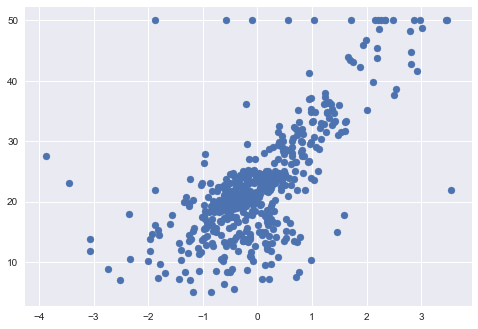

In [26]:
#plot y vs one feature
plt.style.use('seaborn')
plt.scatter(X[:,5], y)
plt.show()

In [28]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))

print(X.shape)

(506, 14)


In [37]:
# X - matrix | x - vector
def hypothesis(x, theta):
    y_ = 0.0
    m = x.shape[0]
    for i in range(m):
        y_ += (theta[i]*x[i])
        
    return y_

def error(X, y, theta):
    error = 0.0
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        error += (y[i] - y_)**2
        
    return error/m

def gradient(X, y, theta):
    m,n = X.shape
    
    grad = np.zeros((n,))
    
    # for all values of j
    for j in range(n):
        for i in range(m):
            y_ = hypothesis(X[i], theta)
            grad[j] += (y_ - y[i])*X[i][j]
        
    return grad/m
    
    
def gradientDescent(X, y, learning_rate=0.1, max_epochs=300):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e = error(X, y, theta)
        error_list.append(e)
        
        # gradient descent
        grad = gradient(X, y, theta)
        for j in range(n):
            theta[j] = theta[j] - learning_rate*grad[j]
            
    return theta, error_list

In [41]:
theta, error_list = gradientDescent(X, y)

In [42]:
print(theta)

[ 2.25328063e+01 -9.03091692e-01  1.03815625e+00  1.53477685e-02
  6.99554920e-01 -2.02101672e+00  2.70014278e+00 -1.93085233e-03
 -3.10234837e+00  2.34354753e+00 -1.72031485e+00 -2.04614394e+00
  8.47845679e-01 -3.73089521e+00]


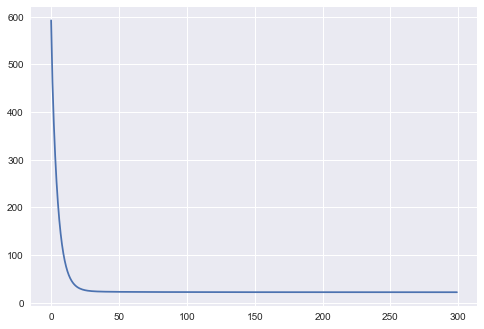

In [43]:
plt.plot(error_list)


In [49]:
#predictions
y_ = []

for i in range(X.shape[0]):
    pred = hypothesis(X[i], theta)
    y_.append(pred)
    
y_ = np.array(y_)

In [50]:
#computing score (R2 score)
def r2_score(Y, Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    
    score = 1 - num/denom
    return score*100

In [51]:
r2_score(y, y_)

74.04541323942743

In [56]:
## using vectorized implementation (by replacing explicit 'for' loops)
def hypothesis(X, theta):
    return np.dot(X, theta)

def error(X, y, theta):
    error = 0.0
    y_ = hypothesis(X, theta)
    error = np.sum((y-y_)**2)
    
    return error/X.shape[0]

def gradient(X, y, theta):
    y_ = hypothesis(X, theta)
    grad = np.dot(X.T, (y_ - y))
    
    return grad/X.shape[0]
    
def gradientDescent(X, y, learning_rate=0.1, max_epochs=300):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e = error(X, y, theta)
        error_list.append(e)
        
        # gradient descent
        grad = gradient(X, y, theta)
        theta = theta - learning_rate*grad
        
    return theta, error_list

In [57]:
theta, error_list = gradientDescent(X, y)

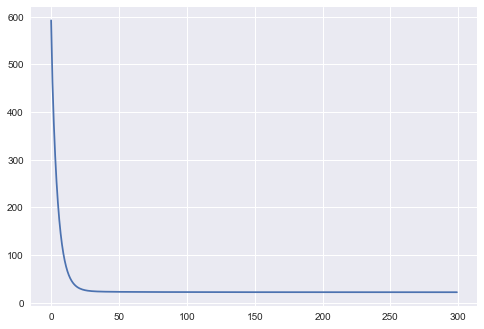

In [59]:
plt.plot(error_list)

In [61]:
y_ = hypothesis(X, theta)
r2_score(y, y_)

74.04541323942743